In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project1\1st Project - Customer Segmentation-20240324\Digital_Contact.csv", sep=';')


#from google.colab import files
#files.upload()

In [3]:
# Exportar data, ficheiro csv, separador ;
#df = pd.read_csv('/content/Digital_Contact.csv', sep=';')

# numerar cada exportação, conforme faço alterações - no ficheiro de apoio vai estar o que cada base significa
df

,Cust_ID,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
0,4,72,1,7,7,1.0,73
1,5,15,20,1,35,15.0,16
2,6,9,7,3,73,19.0,10
3,9,67,0,2,0,1.0,101
4,10,38,0,1,9,0.0,56
...,...,...,...,...,...,...,...
3995,6489,13,14,1,83,22.0,13
3996,6491,17,13,2,22,21.0,7
3997,6492,34,1,2,1,2.0,53
3998,6495,12,17,0,15,11.0,11


In [4]:
df.set_index('Cust_ID', inplace = True)

In [5]:
df.describe

<bound method NDFrame.describe of          Email_Clicks  SM_Comments  App_Clicks  SM_Likes  SM_Shares  SM_Clicks
Cust_ID                                                                       
4                  72            1           7         7        1.0         73
5                  15           20           1        35       15.0         16
6                   9            7           3        73       19.0         10
9                  67            0           2         0        1.0        101
10                 38            0           1         9        0.0         56
...               ...          ...         ...       ...        ...        ...
6489               13           14           1        83       22.0         13
6491               17           13           2        22       21.0          7
6492               34            1           2         1        2.0         53
6495               12           17           0        15       11.0         11
6496              

Check for missing values

In [6]:
df.isna().sum()

Email_Clicks     0
SM_Comments      0
App_Clicks       0
SM_Likes         0
SM_Shares       39
SM_Clicks        0
dtype: int64

In [7]:
print(df["SM_Shares"].mean())
print(df["SM_Shares"].median())

8.355970714466045
2.0


Using KNN for the missing values in SM_Shares

In [8]:
imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

Check for missing values after KNN just to make sure...

In [9]:
df.isna().sum()

Email_Clicks    0
SM_Comments     0
App_Clicks      0
SM_Likes        0
SM_Shares       0
SM_Clicks       0
dtype: int64

In [10]:
print(df["SM_Shares"].mean())
print(df["SM_Shares"].median())

8.35635
2.0


Check for high kurtosis, meaning variables with outliers

In [11]:
df.kurt()

Email_Clicks    0.053571
SM_Comments    -1.171921
App_Clicks      1.900722
SM_Likes       -0.844043
SM_Shares      -1.124522
SM_Clicks      -0.696066
dtype: float64

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='App_Clicks', ylabel='Count'>

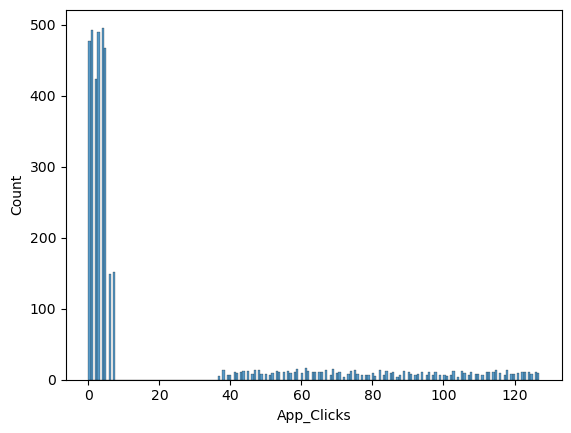

In [12]:
sns.histplot(df, x='App_Clicks')

Check for correlation between columns

In [13]:
df.corr()

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
Email_Clicks,1.000000,-0.600326,-0.144089,-0.531694,-0.574774,0.810447
SM_Comments,-0.600326,1.000000,-0.387786,0.754854,0.791200,-0.579699
App_Clicks,-0.144089,-0.387786,1.000000,-0.423025,-0.423475,-0.291367
SM_Likes,-0.531694,0.754854,-0.423025,1.000000,0.745158,-0.500684
SM_Shares,-0.574774,0.791200,-0.423475,0.745158,1.000000,-0.546753
SM_Clicks,0.810447,-0.579699,-0.291367,-0.500684,-0.546753,1.000000


In [14]:
df_sqrt = df.copy()
df_sqrt["Email_Clicks"] = np.sqrt(df_sqrt["Email_Clicks"])
df_sqrt["SM_Comments"] = np.sqrt(df_sqrt["SM_Comments"])
df_sqrt["App_Clicks"] = np.sqrt(df_sqrt["App_Clicks"])
df_sqrt["SM_Likes"] = np.sqrt(df_sqrt["SM_Likes"])
df_sqrt["SM_Shares"] = np.sqrt(df_sqrt["SM_Shares"])
df_sqrt["SM_Clicks"] = np.sqrt(df_sqrt["SM_Clicks"])

In [15]:
df_sqrt

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
Cust_ID,,,,,,
4,8.485281,1.000000,2.645751,2.645751,1.000000,8.544004
5,3.872983,4.472136,1.000000,5.916080,3.872983,4.000000
6,3.000000,2.645751,1.732051,8.544004,4.358899,3.162278
9,8.185353,0.000000,1.414214,0.000000,1.000000,10.049876
10,6.164414,0.000000,1.000000,3.000000,0.000000,7.483315
...,...,...,...,...,...,...
6489,3.605551,3.741657,1.000000,9.110434,4.690416,3.605551
6491,4.123106,3.605551,1.414214,4.690416,4.582576,2.645751
6492,5.830952,1.000000,1.414214,1.000000,1.414214,7.280110


c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SM_Likes', ylabel='Count'>

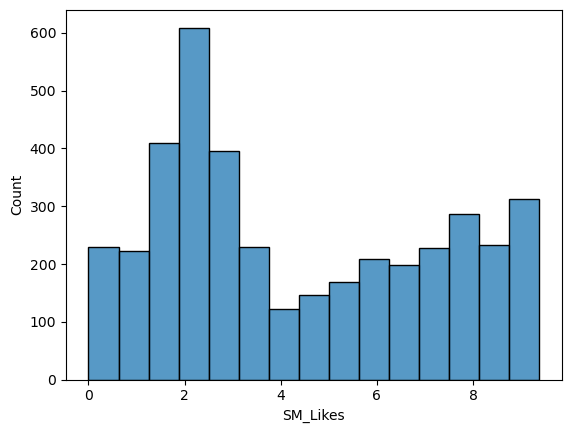

In [16]:
sns.histplot(df_sqrt, x='SM_Likes')

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='App_Clicks', ylabel='Count'>

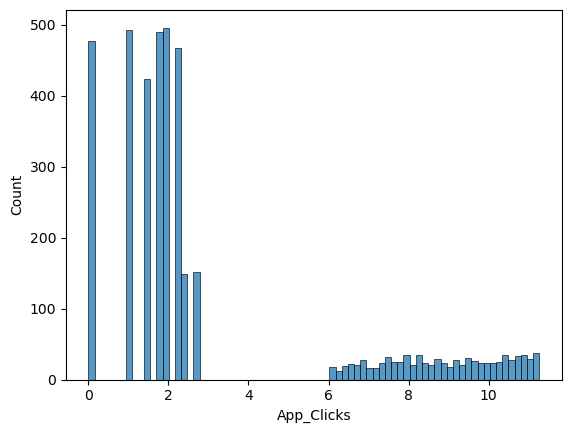

In [17]:
sns.histplot(df_sqrt, x='App_Clicks')

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Email_Clicks', ylabel='Count'>

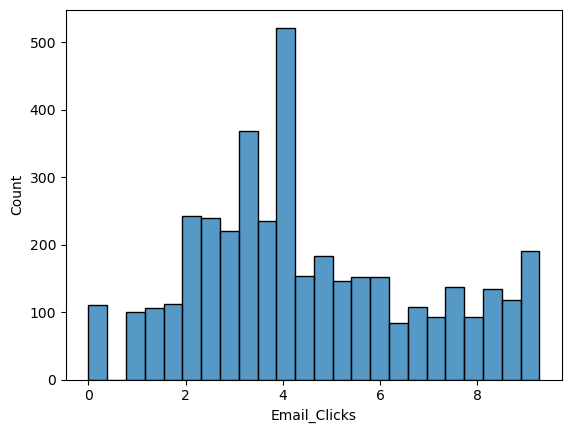

In [18]:
sns.histplot(df_sqrt, x='Email_Clicks')

Scalling data with StandardScaler, since it is more appropriate for data with outliers than MinMaxScaler

In [19]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sqrt)

In [20]:
df_scaled

array([[ 1.71461353, -0.85387152, -0.13629957, -0.60092851, -0.76485908,
         1.33280384],
       [-0.27847009,  1.29974075, -0.65535869,  0.55252805,  0.900474  ,
        -0.23793069],
       [-0.65570694,  0.16691519, -0.42447469,  1.47940625,  1.18213638,
        -0.52750778],
       ...,
       [ 0.56761467, -0.85387152, -0.52471846, -1.1813909 , -0.52475899,
         0.89591121],
       [-0.4551576 ,  1.08325268, -0.97075211, -0.16807938,  0.57797916,
        -0.47415431],
       [-0.58558291,  0.48729362, -0.52471846,  0.22942343,  1.31179125,
        -0.28183678]])

Reduce data to two dimensions for visualization and better performance in KMeans

In [21]:
pca_model = PCA(n_components=2)
df_reduced = pca_model.fit_transform(df_scaled)

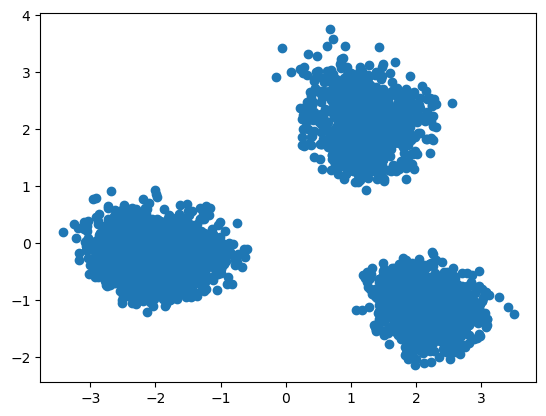

In [22]:
plt.scatter(df_reduced[:,0], df_reduced[:,1])

<Axes: xlabel='0', ylabel='1'>

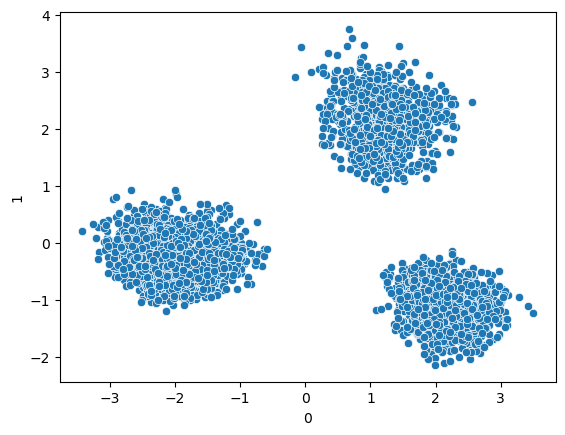

In [23]:
df_final = pd.DataFrame(df_reduced, index=df_sqrt.index)
df_final2 = df_final.copy()
sns.scatterplot(df_final, x=df_final[0], y=df_final[1])

We have three nicely defined clusters, but can check with Elbow Method if three is indeed the optimal number of clusters

In [24]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0)
    km.fit(df_final)
    distortions.append(km.inertia_)

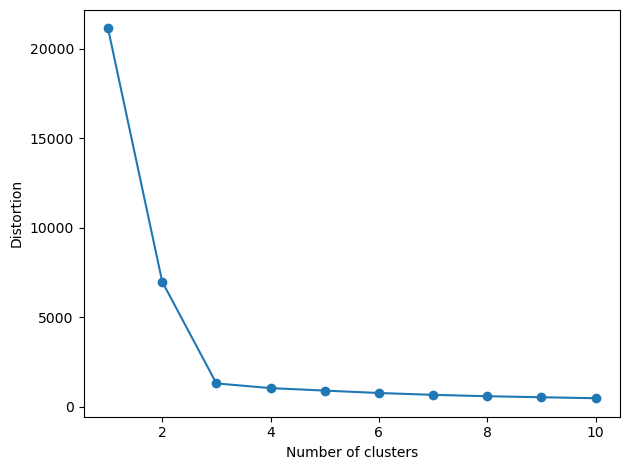

In [25]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [26]:
ks = range(2, 11)

# Calculate silhouette scores for each value of k
silhouette_scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)

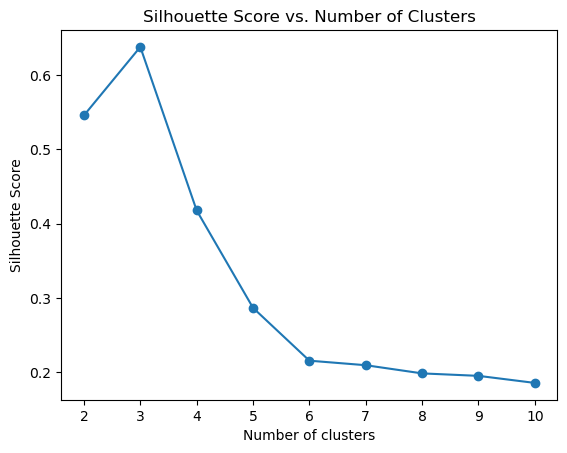

In [27]:
# Plot the silhouette scores
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(ks)
plt.show()

Apply KMeans to the dataframe with 3 clusters

In [28]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300)

df_clustered = km.fit_predict(df_final)

In [29]:
df_final["cluster"] = km.labels_

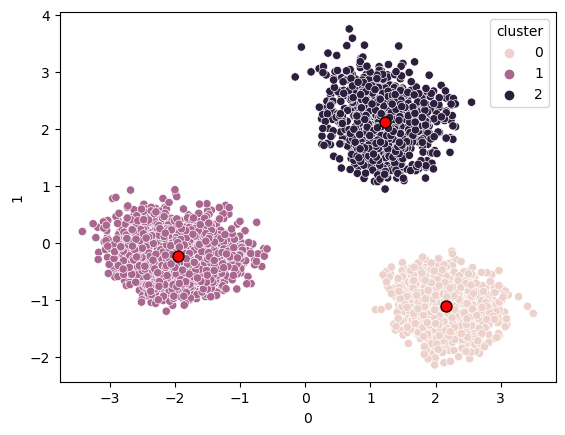

In [30]:
sns.scatterplot(df_final, x=df_final[0], y=df_final[1], hue='cluster')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='.',
            c='red', edgecolor='black',
            label='Centroids')

In [31]:
df_final["cluster"].value_counts()

cluster
1    1903
0    1243
2     854
Name: count, dtype: int64

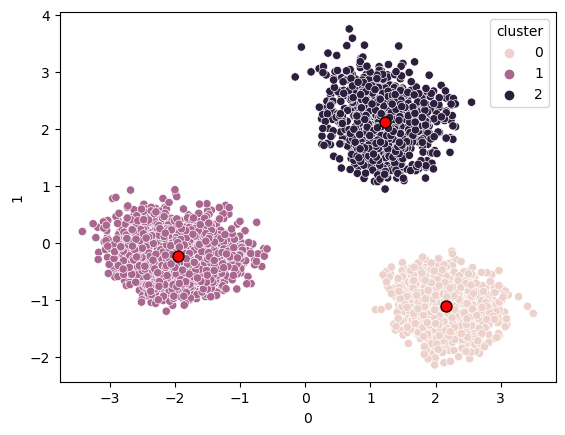

In [32]:
km_elkan = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            algorithm='elkan')

df_clustered2 = km_elkan.fit_predict(df_final2)

df_final2["cluster"] = km_elkan.labels_

sns.scatterplot(df_final2, x=df_final2[0], y=df_final2[1], hue='cluster')
plt.scatter(km_elkan.cluster_centers_[:, 0],
            km_elkan.cluster_centers_[:, 1],
            s=250, marker='.',
            c='red', edgecolor='black',
            label='Centroids')

Provides the exact same result as with the default algorithm

In [81]:
df_final["cluster"].value_counts()

cluster
1    1903
0    1243
2     854
Name: count, dtype: int64

Merge the 3 cluster labels to the initial dataframe

In [33]:
df = df.merge(df_final["cluster"], left_index=True, right_index=True)

In [34]:
df

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks,cluster
Cust_ID,,,,,,,
4,72.0,1.0,7.0,7.0,1.0,73.0,0
5,15.0,20.0,1.0,35.0,15.0,16.0,1
6,9.0,7.0,3.0,73.0,19.0,10.0,1
9,67.0,0.0,2.0,0.0,1.0,101.0,0
10,38.0,0.0,1.0,9.0,0.0,56.0,0
...,...,...,...,...,...,...,...
6489,13.0,14.0,1.0,83.0,22.0,13.0,1
6491,17.0,13.0,2.0,22.0,21.0,7.0,1
6492,34.0,1.0,2.0,1.0,2.0,53.0,0


Exploring the 3 clusters

In [35]:
cluster_distribution = df["cluster"].value_counts()
print("Cluster Distribution:")
print(cluster_distribution)

cluster_characteristics = df.groupby("cluster").agg(['mean', 'median', 'std'])
print("\nCluster Characteristics:")
print(cluster_characteristics)

Cluster Distribution:
cluster
1    1903
0    1243
2     854
Name: count, dtype: int64

Cluster Characteristics:
        Email_Clicks                   SM_Comments                   \
                mean median        std        mean median       std   
cluster                                                               
0          55.628319   55.0  18.741488    0.998391    1.0  0.815508   
1           9.682081   10.0   5.663851   15.781923   16.0  5.178136   
2          18.124122   18.0  10.313994    2.010539    2.0  1.418726   

        App_Clicks                     SM_Likes                    SM_Shares  \
              mean median        std       mean median        std       mean   
cluster                                                                        
0         3.501207    4.0   2.274402   5.539019    5.0   3.509001   1.010137   
1         2.483973    3.0   1.710557  51.545455   52.0  21.274826  16.463374   
2        80.827869   79.0  26.402904   3.339578    3.0   2.32

Cluster 0 - Um cluster muito focado em SM_Likes, Shares e SM_Comments, baixo uso de APP e baixo uso de Mail

Cluster 1 - Um cluster baseado em Clicks, tanto a nivel de mail, como a nivel de e-mail, com baixo uso de Mail e das outras interacções de SM

Cluster 2 - É o cluster que tem maior uso da APP, muito baixo uso de SM e de E-mail

In [36]:
df.columns

Index(['Email_Clicks', 'SM_Comments', 'App_Clicks', 'SM_Likes', 'SM_Shares',
       'SM_Clicks', 'cluster'],
      dtype='object')

In [37]:
df0 = df.query(' cluster == 0 ').copy()
df1 = df.query(' cluster == 1 ').copy()
df2 = df.query(' cluster == 2 ').copy()

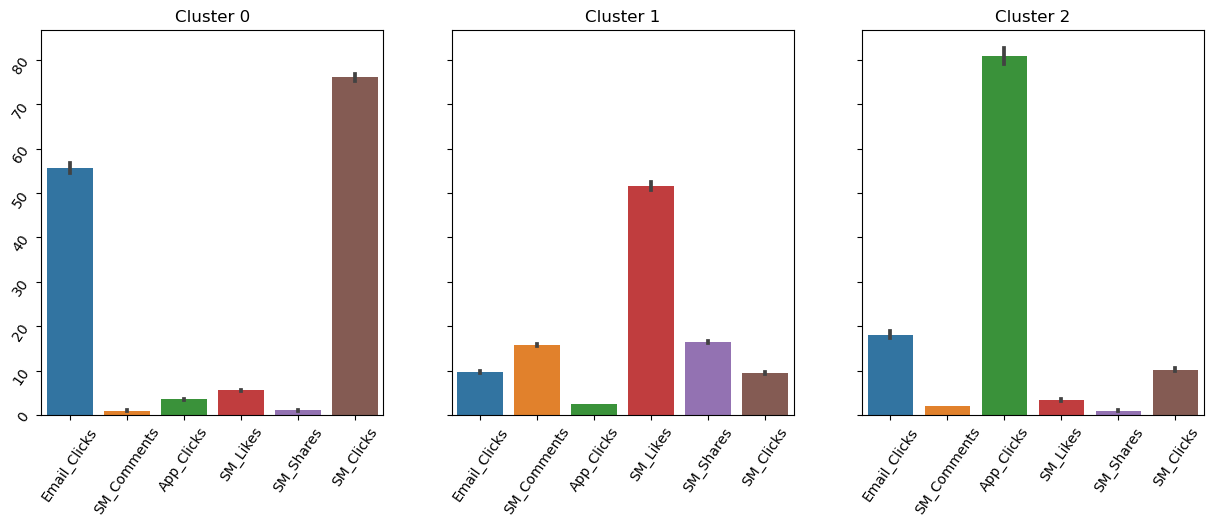

In [38]:
#Verificar o codigo

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))
sns.barplot(df0.melt(id_vars='cluster'), x='variable', y='value', ax=ax1).set(xlabel=None, ylabel=None)
ax1.tick_params(labelrotation=55)
ax1.title.set_text('Cluster 0')

sns.barplot(df1.melt(id_vars='cluster'), x='variable', y='value', ax=ax2).set( xlabel=None, ylabel=None)
ax2.tick_params(labelrotation=55)
ax2.title.set_text('Cluster 1')

sns.barplot(df2.melt(id_vars='cluster'), x='variable', y='value', ax=ax3).set( xlabel=None, ylabel=None)
ax3.tick_params(labelrotation=55)
ax3.title.set_text('Cluster 2')



Vamos correr K-Means no dataset completo antes de aplicar o PCA

In [39]:
df_scaled_1 = MinMaxScaler().fit_transform(df_sqrt)

In [40]:
cols = df_sqrt.columns
df_scaled_1 = pd.DataFrame(df_scaled_1, columns = cols)
df_scaled_1.index = df_sqrt.index #tenho que manter o index
df_scaled_1

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks
Cust_ID,,,,,,
4,0.914991,0.204124,0.234772,0.282038,0.196116,0.845982
5,0.417635,0.912871,0.088736,0.630656,0.759555,0.396059
6,0.323498,0.540062,0.153695,0.910794,0.854850,0.313112
9,0.882649,0.000000,0.125491,0.000000,0.196116,0.995086
10,0.664726,0.000000,0.088736,0.319801,0.000000,0.740959
...,...,...,...,...,...,...
6489,0.388797,0.763763,0.088736,0.971175,0.919866,0.357003
6491,0.444606,0.735980,0.125491,0.500000,0.898717,0.261968
6492,0.628768,0.204124,0.125491,0.106600,0.277350,0.720838


In [41]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, n_init=10).fit(df_scaled_1)
    inertias.append(model.inertia_)

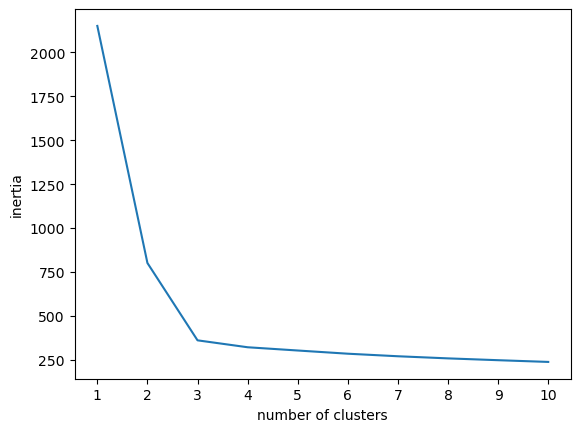

In [42]:
plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [43]:
from sklearn.metrics import silhouette_score

ks = range(2, 11)

# Calculate silhouette scores for each value of k
silhouette_scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(df_scaled_1)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_scaled_1, labels)
    silhouette_scores.append(silhouette_avg)



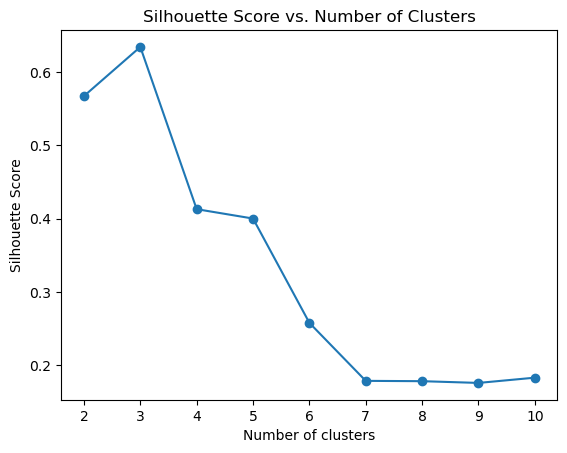

In [44]:
# Plot the silhouette scores
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(ks)
plt.show()

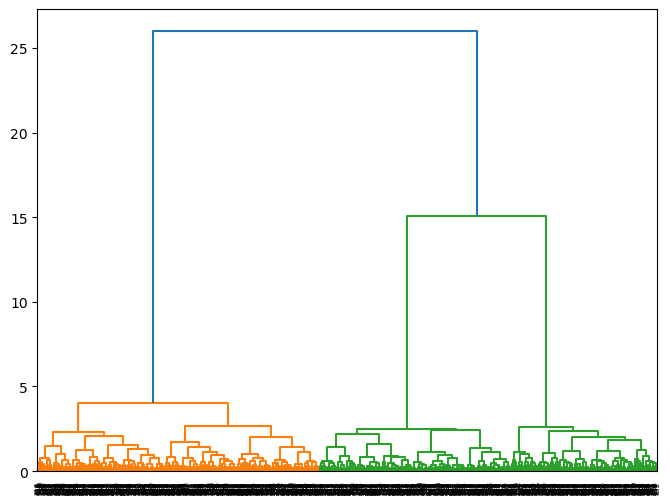

In [45]:
df_scaled_1_sample = df_scaled_1.sample(n = 1000, random_state = 100) #select only a sample, due to computational weight, creating a new data frame
clusters = hierarchy.linkage(df_scaled_1_sample, method="ward") #
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

# no dendograma para ver os cluster queremos ter linhas com grande distancia entre elas, no de baixo poderiamos considerar 2, 3 ou 4?
# passar a linha

In [46]:
df_scaled_k3 = df_scaled_1.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(df_scaled_k3)

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
df_scaled_k3['label'] = model_k3.labels_

In [48]:
df_scaled_k3.groupby(['label']).mean().transpose()

label,0,1,2
Email_Clicks,0.431556,0.313012,0.791864
SM_Comments,0.252574,0.799143,0.164162
App_Clicks,0.786671,0.123268,0.149707
SM_Likes,0.173000,0.747064,0.229477
SM_Shares,0.155457,0.782758,0.158670
SM_Clicks,0.290959,0.284011,0.859128


In [49]:
df_scaled_k3

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks,label
Cust_ID,,,,,,,
4,0.914991,0.204124,0.234772,0.282038,0.196116,0.845982,2
5,0.417635,0.912871,0.088736,0.630656,0.759555,0.396059,1
6,0.323498,0.540062,0.153695,0.910794,0.854850,0.313112,1
9,0.882649,0.000000,0.125491,0.000000,0.196116,0.995086,2
10,0.664726,0.000000,0.088736,0.319801,0.000000,0.740959,2
...,...,...,...,...,...,...,...
6489,0.388797,0.763763,0.088736,0.971175,0.919866,0.357003,1
6491,0.444606,0.735980,0.125491,0.500000,0.898717,0.261968,1
6492,0.628768,0.204124,0.125491,0.106600,0.277350,0.720838,2


In [50]:
df_merged=pd.concat([df_scaled_k3,df], axis=1)

In [51]:
df_merged

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks,label,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks,cluster
Cust_ID,,,,,,,,,,,,,,
4,0.914991,0.204124,0.234772,0.282038,0.196116,0.845982,2,72.0,1.0,7.0,7.0,1.0,73.0,0
5,0.417635,0.912871,0.088736,0.630656,0.759555,0.396059,1,15.0,20.0,1.0,35.0,15.0,16.0,1
6,0.323498,0.540062,0.153695,0.910794,0.854850,0.313112,1,9.0,7.0,3.0,73.0,19.0,10.0,1
9,0.882649,0.000000,0.125491,0.000000,0.196116,0.995086,2,67.0,0.0,2.0,0.0,1.0,101.0,0
10,0.664726,0.000000,0.088736,0.319801,0.000000,0.740959,2,38.0,0.0,1.0,9.0,0.0,56.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,0.388797,0.763763,0.088736,0.971175,0.919866,0.357003,1,13.0,14.0,1.0,83.0,22.0,13.0,1
6491,0.444606,0.735980,0.125491,0.500000,0.898717,0.261968,1,17.0,13.0,2.0,22.0,21.0,7.0,1
6492,0.628768,0.204124,0.125491,0.106600,0.277350,0.720838,2,34.0,1.0,2.0,1.0,2.0,53.0,0


In [52]:
df_merged.groupby(['label']).mean().transpose()

label,0,1,2
Email_Clicks,0.431556,0.313012,0.791864
SM_Comments,0.252574,0.799143,0.164162
App_Clicks,0.786671,0.123268,0.149707
SM_Likes,0.173000,0.747064,0.229477
SM_Shares,0.155457,0.782758,0.158670
SM_Clicks,0.290959,0.284011,0.859128
Email_Clicks,18.124122,9.682081,55.628319
SM_Comments,2.010539,15.781923,0.998391
App_Clicks,80.827869,2.483973,3.501207
SM_Likes,3.339578,51.545455,5.539019


In [53]:
dfm0 = df_merged.query(' cluster == 0 ').copy()
dfm1 = df_merged.query(' cluster == 1 ').copy()
dfm2 = df_merged.query(' cluster == 2 ').copy()

Variable Dist by Mean

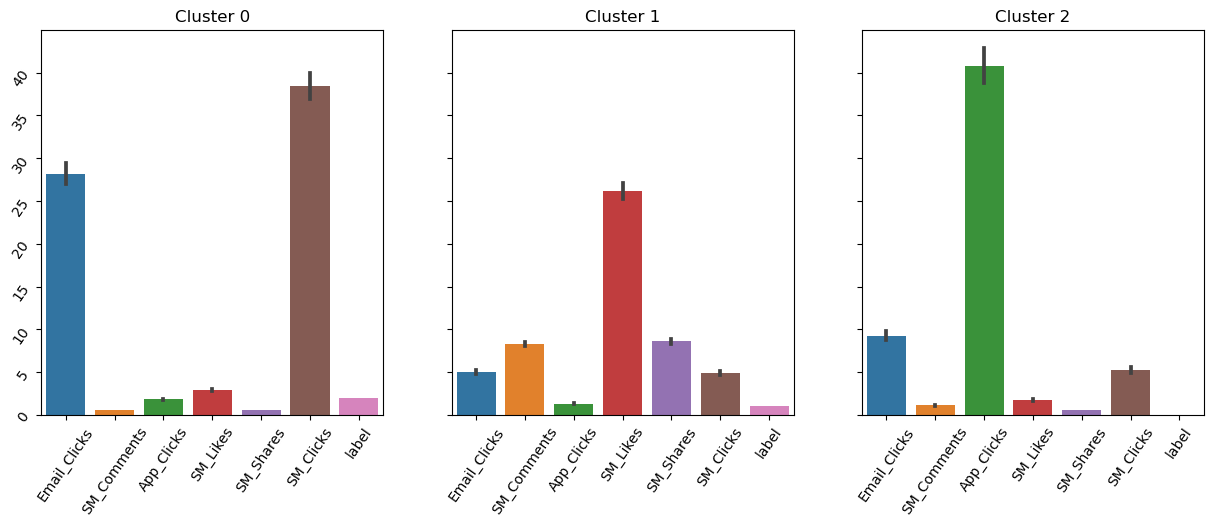

In [89]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))
sns.barplot(dfm0.melt(id_vars='cluster'), x='variable', y='value', ax=ax1).set(xlabel=None, ylabel=None)
ax1.tick_params(labelrotation=55)
ax1.title.set_text('Cluster 0')

sns.barplot(dfm1.melt(id_vars='cluster'), x='variable', y='value', ax=ax2).set( xlabel=None, ylabel=None)
ax2.tick_params(labelrotation=55)
ax2.title.set_text('Cluster 1')

sns.barplot(dfm2.melt(id_vars='cluster'), x='variable', y='value', ax=ax3).set( xlabel=None, ylabel=None)
ax3.tick_params(labelrotation=55)
ax3.title.set_text('Cluster 2')

Variable Dist by Sum

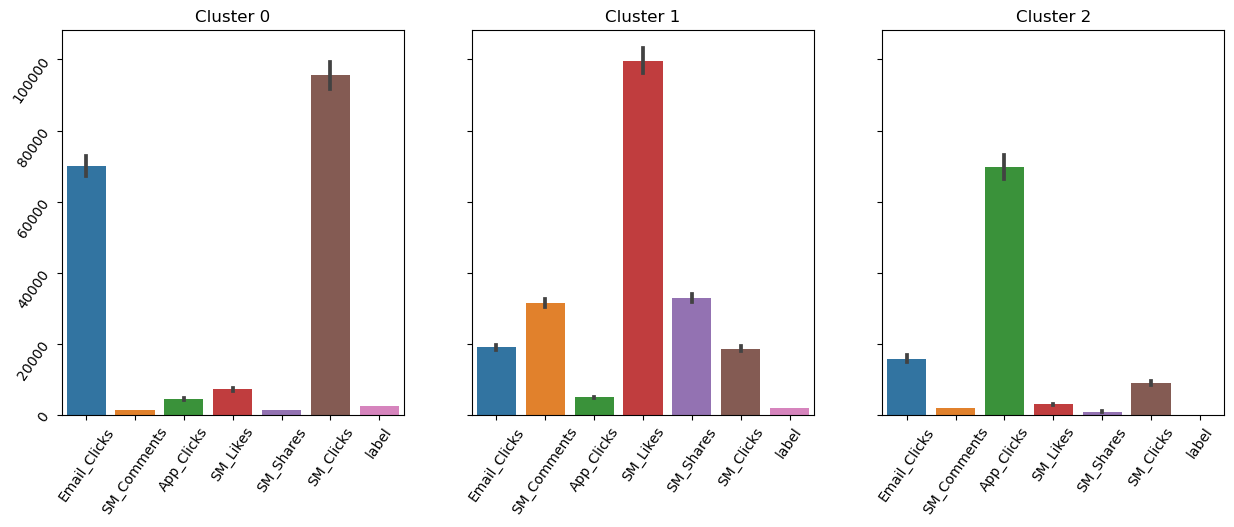

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))
sns.barplot(dfm0.melt(id_vars='cluster'), x='variable', y='value', ax=ax1, estimator='sum').set(xlabel=None, ylabel=None)
ax1.tick_params(labelrotation=55)
ax1.title.set_text('Cluster 0')

sns.barplot(dfm1.melt(id_vars='cluster'), x='variable', y='value', ax=ax2, estimator='sum').set( xlabel=None, ylabel=None)
ax2.tick_params(labelrotation=55)
ax2.title.set_text('Cluster 1')

sns.barplot(dfm2.melt(id_vars='cluster'), x='variable', y='value', ax=ax3, estimator='sum').set( xlabel=None, ylabel=None)
ax3.tick_params(labelrotation=55)
ax3.title.set_text('Cluster 2')

**Demographic**

In [56]:
#from google.colab import files
#files.upload()

In [57]:
#demo = pd.read_csv(r'/content/Demographic.txt', delimiter = "\t")
demo = pd.read_csv(r"C:\Users\mjcanudo\Documents\Nova\ML\Project1\1st Project - Customer Segmentation-20240324\Demographic.txt", sep= '\t')

In [58]:
demo = demo.set_index('Cust_ID')

In [59]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 4 to 6496
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             4000 non-null   object
 1   birth_year       4000 non-null   int64 
 2   education_level  4000 non-null   object
 3   dependents       4000 non-null   int64 
 4   City             2019 non-null   object
dtypes: int64(2), object(3)
memory usage: 187.5+ KB


In [60]:
demo.describe().T

,count,mean,std,min,25%,50%,75%,max
birth_year,4000.0,1989.299,16.398836,1944.0,1980.0,1997.0,2002.0,2006.0
dependents,4000.0,0.298,0.498757,0.0,0.0,0.0,1.0,2.0


In [61]:
demo.describe(include = ['O'])

,name,education_level,City
count,4000,4000,2019
unique,3892,7,3
top,Mr Michael Jackson,high school,Birmingham
freq,4,1280,1284


In [62]:
demo['education_level'].value_counts()

education_level
high school              1280
Bachelor                 1023
less than high school     818
Master                    666
PhD                       150
High School                42
PHD                        21
Name: count, dtype: int64

In [63]:
demo['City'].value_counts()

City
Birmingham    1284
London         700
Brimingham      35
Name: count, dtype: int64

In [64]:
demo['dependents'].value_counts()

dependents
0    2887
1    1034
2      79
Name: count, dtype: int64

In [65]:
demo[['Gender', 'Complete Name']] = demo['name'].str.split(' ', n=1, expand=True)
demo.drop(columns=['Complete Name'], inplace=True)
demo.drop(columns=['name'], inplace=True)
demo

,birth_year,education_level,dependents,City,Gender
Cust_ID,,,,,
4,2002,Master,1,NaN,Mr
5,1994,high school,0,Birmingham,Miss
6,2005,PhD,1,NaN,Miss
9,2003,high school,0,NaN,Mr
10,2002,less than high school,0,NaN,Mr
...,...,...,...,...,...
6489,1995,Bachelor,0,NaN,Miss
6491,1996,Master,0,NaN,Mr
6492,2004,high school,0,Birmingham,Mr


In [66]:
demo['Gender'] = demo['Gender'].replace('Mr','Male')


In [67]:
demo['Gender'] = demo['Gender'].replace('Miss','Female')
demo

,birth_year,education_level,dependents,City,Gender
Cust_ID,,,,,
4,2002,Master,1,NaN,Male
5,1994,high school,0,Birmingham,Female
6,2005,PhD,1,NaN,Female
9,2003,high school,0,NaN,Male
10,2002,less than high school,0,NaN,Male
...,...,...,...,...,...
6489,1995,Bachelor,0,NaN,Female
6491,1996,Master,0,NaN,Male
6492,2004,high school,0,Birmingham,Male


In [68]:
demo['Gender'].value_counts()

Gender
Female    2368
Male      1632
Name: count, dtype: int64

In [69]:
demo['education_level'] = demo['education_level'].replace(to_replace = 'PHD' , value ='PhD')
demo['education_level'] = demo['education_level'].replace(to_replace = 'PhD' , value ='PhD')
demo['education_level'] = demo['education_level'].replace(to_replace = 'Phd' , value ='PhD')
demo['education_level'] = demo['education_level'].replace(to_replace = 'high school', value ='High School')
demo['City'] = demo['City'].replace(to_replace = 'Brimingham', value ='Birmingham')
demo

,birth_year,education_level,dependents,City,Gender
Cust_ID,,,,,
4,2002,Master,1,NaN,Male
5,1994,High School,0,Birmingham,Female
6,2005,PhD,1,NaN,Female
9,2003,High School,0,NaN,Male
10,2002,less than high school,0,NaN,Male
...,...,...,...,...,...
6489,1995,Bachelor,0,NaN,Female
6491,1996,Master,0,NaN,Male
6492,2004,High School,0,Birmingham,Male


In [70]:
demo['City'].value_counts()


City
Birmingham    1319
London         700
Name: count, dtype: int64

In [71]:
demo['education_level'].value_counts()

education_level
High School              1322
Bachelor                 1023
less than high school     818
Master                    666
PhD                       171
Name: count, dtype: int64

In [72]:
from datetime import date

demo['Age'] = date.today().year - demo['birth_year']
demo.drop(columns=['birth_year'], inplace=True)
demo

,education_level,dependents,City,Gender,Age
Cust_ID,,,,,
4,Master,1,NaN,Male,22
5,High School,0,Birmingham,Female,30
6,PhD,1,NaN,Female,19
9,High School,0,NaN,Male,21
10,less than high school,0,NaN,Male,22
...,...,...,...,...,...
6489,Bachelor,0,NaN,Female,29
6491,Master,0,NaN,Male,28
6492,High School,0,Birmingham,Male,20


In [73]:
#estamos a assumir que quem respondeu 2 dependents queria dizer que tinha (binário = 1)

demo['dependents'] = demo['dependents'].replace(to_replace = 2 , value = 1)
demo

,education_level,dependents,City,Gender,Age
Cust_ID,,,,,
4,Master,1,NaN,Male,22
5,High School,0,Birmingham,Female,30
6,PhD,1,NaN,Female,19
9,High School,0,NaN,Male,21
10,less than high school,0,NaN,Male,22
...,...,...,...,...,...
6489,Bachelor,0,NaN,Female,29
6491,Master,0,NaN,Male,28
6492,High School,0,Birmingham,Male,20


In [74]:
demo['dependents'].value_counts()

dependents
0    2887
1    1113
Name: count, dtype: int64

In [75]:
#aqui criamos a tabela demografica sem City (demo_drop)

demo_drop = demo.copy()
demo_drop = demo_drop.drop(columns=['City'])

In [76]:
#vamos fazer o cruzamento da df (PCA) com a demo_drop (retiramos city)
#df_merged é a tabela sem o PCA

df_demo = df.merge(demo_drop, on = 'Cust_ID')
df_demo

,Email_Clicks,SM_Comments,App_Clicks,SM_Likes,SM_Shares,SM_Clicks,cluster,education_level,dependents,Gender,Age
Cust_ID,,,,,,,,,,,
4,72.0,1.0,7.0,7.0,1.0,73.0,0,Master,1,Male,22
5,15.0,20.0,1.0,35.0,15.0,16.0,1,High School,0,Female,30
6,9.0,7.0,3.0,73.0,19.0,10.0,1,PhD,1,Female,19
9,67.0,0.0,2.0,0.0,1.0,101.0,0,High School,0,Male,21
10,38.0,0.0,1.0,9.0,0.0,56.0,0,less than high school,0,Male,22
...,...,...,...,...,...,...,...,...,...,...,...
6489,13.0,14.0,1.0,83.0,22.0,13.0,1,Bachelor,0,Female,29
6491,17.0,13.0,2.0,22.0,21.0,7.0,1,Master,0,Male,28
6492,34.0,1.0,2.0,1.0,2.0,53.0,0,High School,0,Male,20


In [77]:
cluster0_demo = df_demo[df_demo["cluster"] == 0]
cluster1_demo = df_demo[df_demo["cluster"] == 1]
cluster2_demo = df_demo[df_demo["cluster"] == 2]

In [78]:
print('***Descriptive Summary of Categorical variables***')
print(cluster0_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(cluster0_demo['education_level'].value_counts()/len(cluster0_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(cluster0_demo['dependents'].mean())

print(' ')
print('***Mean of Age***')
print(cluster0_demo['Age'].mean())

***Descriptive Summary of Categorical variables***
       education_level Gender
count             1243   1243
unique               5      2
top        High School   Male
freq               425    847
 
***Frequency for each level of education***
education_level
High School              34.19
Bachelor                 24.54
less than high school    20.76
Master                   15.53
PhD                       4.99
Name: count, dtype: float64
 
***Mean of Dependents***
0.2831858407079646
 
***Mean of Age***
41.6283185840708


In [79]:
print('***Descriptive Summary of Categorical variables***')
print(cluster1_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(cluster1_demo['education_level'].value_counts()/len(cluster1_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(cluster1_demo['dependents'].mean())

print(' ')
print('***Mean of Age***')
print(cluster1_demo['Age'].mean())

***Descriptive Summary of Categorical variables***
       education_level  Gender
count             1903    1903
unique               5       2
top        High School  Female
freq               608    1642
 
***Frequency for each level of education***
education_level
High School              31.95
Bachelor                 26.54
less than high school    20.18
Master                   17.55
PhD                       3.78
Name: count, dtype: float64
 
***Mean of Dependents***
0.2727272727272727
 
***Mean of Age***
28.798738833420913


In [80]:
print('***Descriptive Summary of Categorical variables***')
print(cluster2_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(cluster2_demo['education_level'].value_counts()/len(cluster2_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(cluster2_demo['dependents'].mean())

print(' ')
print('***Mean of Age***')
print(cluster2_demo['Age'].mean())

***Descriptive Summary of Categorical variables***
       education_level Gender
count              854    854
unique               5      2
top        High School   Male
freq               289    524
 
***Frequency for each level of education***
education_level
High School              33.84
Bachelor                 24.94
less than high school    20.61
Master                   16.28
PhD                       4.33
Name: count, dtype: float64
 
***Mean of Dependents***
0.28337236533957844
 
***Mean of Age***
37.77049180327869


c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


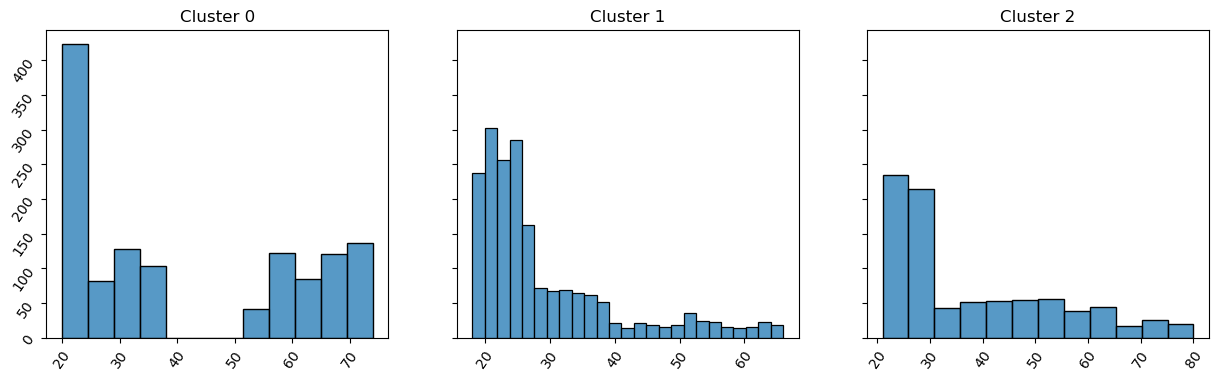

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 4))
sns.histplot(df_demo.query('cluster == 0'), x='Age', ax=ax1).set(xlabel=None, ylabel=None)
ax1.tick_params(labelrotation=55)
ax1.title.set_text('Cluster 0')

sns.histplot(df_demo.query('cluster == 1') ,x='Age', ax=ax2).set( xlabel=None, ylabel=None)
ax2.tick_params(labelrotation=55)
ax2.title.set_text('Cluster 1')

sns.histplot(df_demo.query('cluster == 2'), x='Age', ax=ax3).set( xlabel=None, ylabel=None)
ax3.tick_params(labelrotation=55)
ax3.title.set_text('Cluster 2')

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


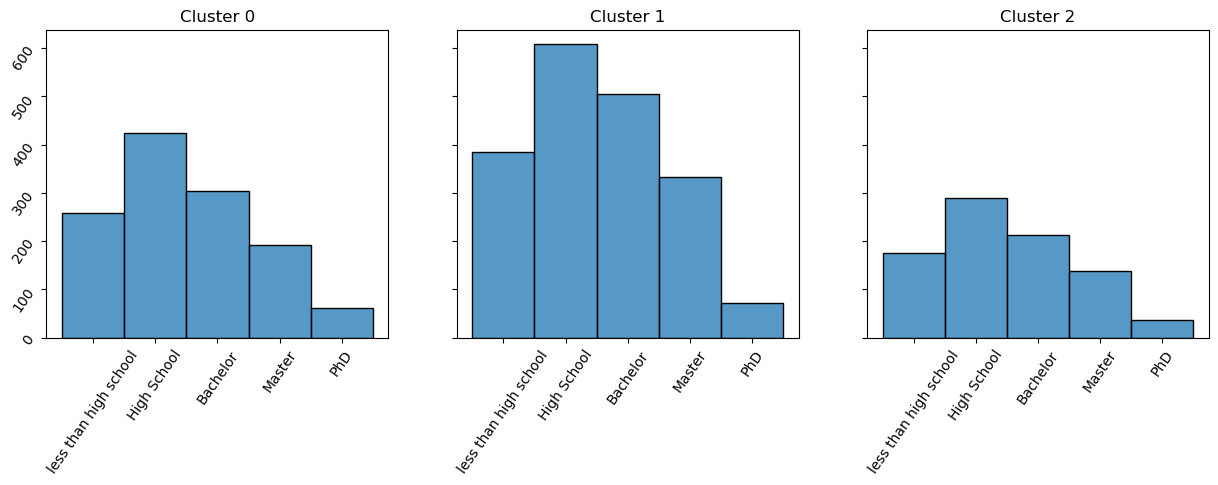

In [84]:
edu_level_dict = {"less than high school":0, "High School":1, "Bachelor":2, "Bachelor":3, "Master":4, "PhD":5}
df_demo["education_level_aux"] = df_demo["education_level"].map(edu_level_dict)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 4))
sns.histplot(df_demo.query('cluster == 0').sort_values('education_level_aux'), x='education_level', ax=ax1).set(xlabel=None, ylabel=None)
ax1.tick_params(labelrotation=55)
ax1.title.set_text('Cluster 0')

sns.histplot(df_demo.query('cluster == 1').sort_values('education_level_aux'),x='education_level', ax=ax2).set( xlabel=None, ylabel=None)
ax2.tick_params(labelrotation=55)
ax2.title.set_text('Cluster 1')

sns.histplot(df_demo.query('cluster == 2').sort_values('education_level_aux'), x='education_level', ax=ax3).set( xlabel=None, ylabel=None)
ax3.tick_params(labelrotation=55)
ax3.title.set_text('Cluster 2')

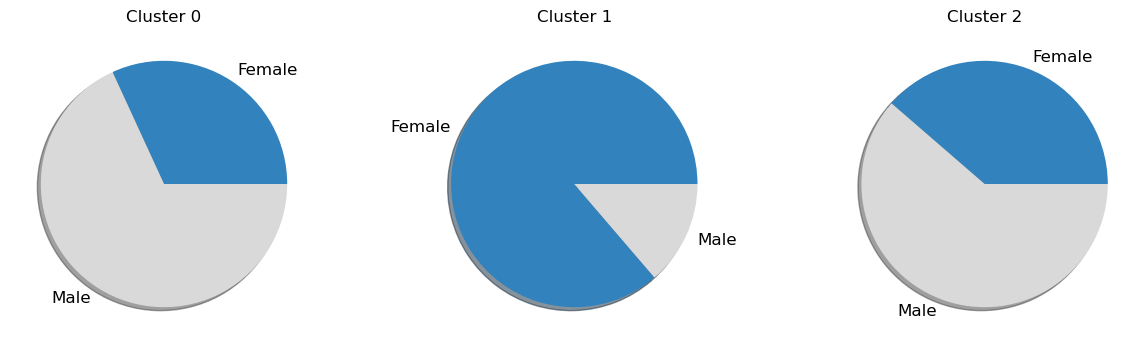

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
df_demo.query(' cluster == 0 ').groupby('Gender').size().plot(kind='pie', textprops={'fontsize': 12}, ax=ax1, shadow=True, colormap="tab20c")
ax1.title.set_text('Cluster 0')

df_demo.query(' cluster == 1 ').groupby('Gender').size().plot(kind='pie', textprops={'fontsize': 12}, ax=ax2, shadow=True, colormap="tab20c")
ax2.title.set_text('Cluster 1')

df_demo.query(' cluster == 2 ').groupby('Gender').size().plot(kind='pie', textprops={'fontsize': 12}, ax=ax3, shadow=True, colormap="tab20c")
ax3.title.set_text('Cluster 2')

<Axes: ylabel='cluster'>

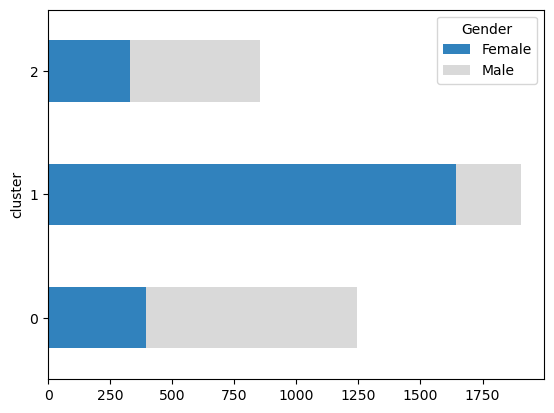

In [86]:
df_demo.groupby(['cluster', 'Gender']).size().unstack().plot(kind='barh', stacked=True, colormap="tab20c")

<Axes: ylabel='cluster'>

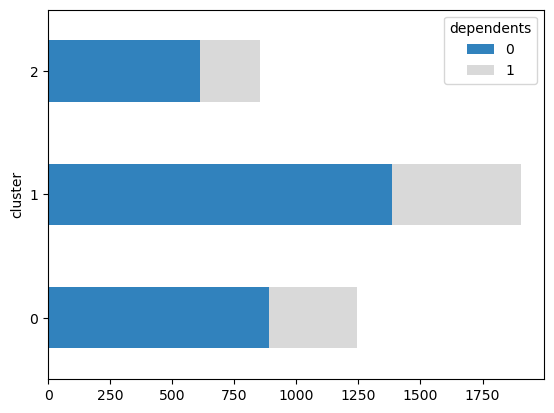

In [87]:
df_demo.groupby(['cluster', 'dependents']).size().unstack().plot(kind='barh', stacked=True, colormap="tab20c")